In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# generate some clustered data (blobs)
n_samples = 2000
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=4, random_state=0)

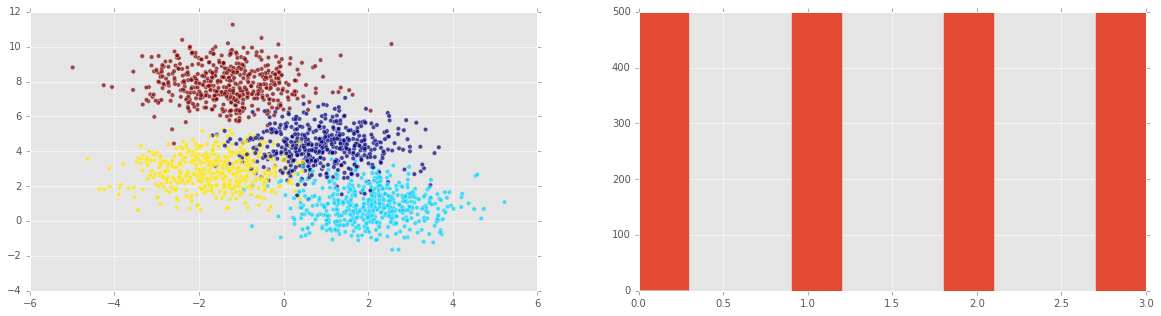

In [3]:
# each axis is a predictor variable and the colour is a key to the target variable
plt.style.use('ggplot')
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.7)
plt.subplot(1, 2, 2)
plt.hist(y)
plt.show()

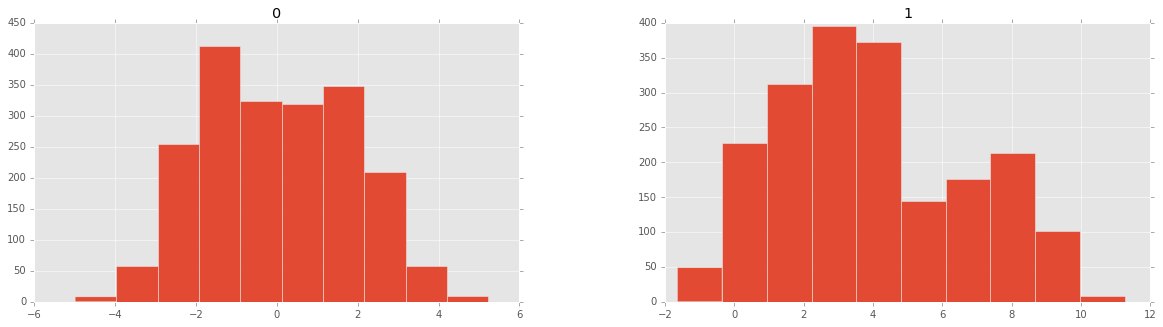

In [4]:
# histogram of features
df = pd.DataFrame(X)
df.hist(figsize=[20, 5]);

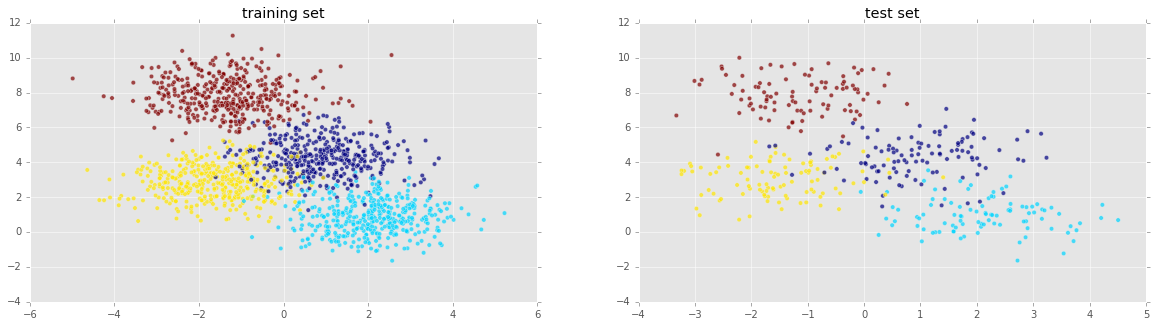

In [5]:
# split into train and test sets and plot both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
plt.figure(figsize=[20, 5])
plt.subplot(1, 2, 1)
plt.title("training set")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.7)
plt.subplot(1, 2, 2)
plt.title("test set")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.7)
plt.show()

In [6]:
# train a KNN classifier on unscaled dataset and print its accuracy
def knn_accuracy(X, y):
    """
    Splits X and y into training and test sets.
    Train a KNN classifier on training set and returns the accuracy score
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier()
    knn_model = knn.fit(X_train, y_train)
    return knn_model.score(X_test, y_test)

print "k-NN score for untrained dataset is: %f" % knn_accuracy(X, y)

k-NN score for untrained dataset is: 0.935000


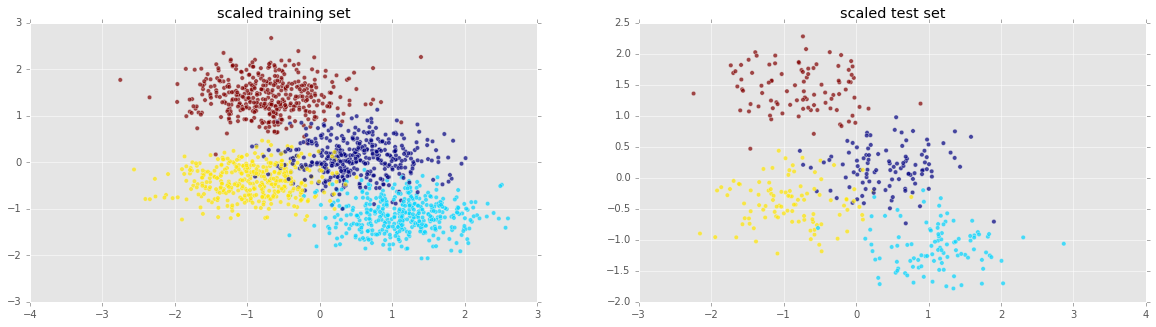

k-NN score for scaled dataset is: 0.935000


In [7]:
# now scale the dataset and train a KNN classifier
Xs = scale(X)
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
plt.figure(figsize=(20,5));
plt.subplot(1, 2, 1 );
plt.scatter(Xs_train[:,0] , Xs_train[:,1],  c = y_train, alpha = 0.7);
plt.title("scaled training set")
plt.subplot(1, 2, 2);
plt.scatter(Xs_test[:,0] , Xs_test[:,1],  c = y_test, alpha = 0.7);
plt.title("scaled test set")
plt.show()

# print its accuracy
print "k-NN score for scaled dataset is: %f" % knn_accuracy(Xs, y)

**There's no improvement in performance since the predictor variables were already around the same range. It only makes sense to scale when the variables have wildly varying ranges.**

## Adding noise

**Now add a third variable of Gaussian noise with mean 0 and variable standard deviation &sigma;, where &sigma; is the strength of the noise.**

In [8]:
noise = [10**i for i in np.arange(-1, 6)]
acc_unscaled = []
acc_scaled = []

for ns in noise:
    new_col = np.transpose([ns * np.random.randn(n_samples)]) # ns is noise strength
    Xn = np.concatenate((X, new_col), axis=1) # add noisy new column to X
    Xns = scale(Xn) # scale Xn
    acc_unscaled.append(knn_accuracy(Xn, y))
    acc_scaled.append(knn_accuracy(Xns, y))

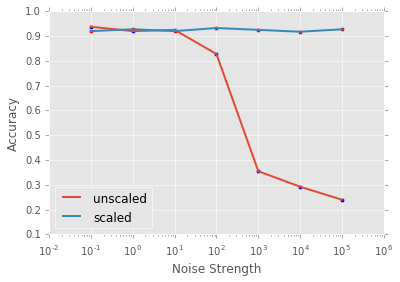

In [9]:
# plot noise strength vs accuracy
plt.scatter(noise, acc_unscaled)
plt.plot(noise, acc_unscaled, label='unscaled', linewidth=2)
plt.scatter(noise, acc_scaled, c='r')
plt.plot(noise, acc_scaled, label='scaled', linewidth=2)
plt.xscale('log')
plt.xlabel('Noise Strength')
plt.ylabel('Accuracy')
plt.legend(loc=3);

**The stronger the noise, the worse the performance of k-Nearest Neighbours. Therefore scaling is really important in KNN classifier**